In [105]:
# https://www.kaggle.com/datasets/rmisra/news-category-dataset

In [106]:
# !kaggle datasets download -d rmisra/news-category-dataset

In [107]:
import zipfile
import os

zip_path = r"D:\New folder\news-category-dataset.zip"  
extract_path = r"D:\New folder\news-category-dataset_extracted"  

os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path) 

print("Extraction complete! Files extracted to:", extract_path)

# List extracted files
print("Extracted files:", os.listdir(extract_path))

Extraction complete! Files extracted to: D:\New folder\news-category-dataset_extracted
Extracted files: ['News_Category_Dataset_v3.json']


In [108]:
import pandas as pd

# Load JSON Lines file correctly
data = pd.read_json('./news-category-dataset_extracted/News_Category_Dataset_v3.json', lines=True)

data.head(1)


,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23


In [109]:


# import boto3

# # AWS Configuration (Use IAM roles or AWS credentials securely)
# BUCKET_NAME = "datastoreall"  # Your S3 bucket name
# LOCAL_FILE_PATH = r"D:\New folder\news-category-dataset_extracted\News_Category_Dataset_v3.json"
# S3_FILE_NAME = "News_Category_Dataset_v3.json"  # Desired name in S3

# # Initialize S3 Client (Using Default AWS Credentials)
# s3 = boto3.client("s3")

# # Upload JSON file
# s3.upload_file(LOCAL_FILE_PATH, BUCKET_NAME, S3_FILE_NAME)

# print("JSON file uploaded successfully!")


In [110]:
import boto3
import pandas as pd

# AWS S3 Configuration
BUCKET_NAME = "datastoreall"  # Your S3 bucket name
JSON_FILE_KEY = "News_Category_Dataset_v3.json"  # JSON file in S3
CSV_FILE_NAME = "News_Category_Dataset_v3.csv"  # CSV file name for upload

# Local file paths
LOCAL_JSON_PATH = r"D:\final_pro\News_Category_Dataset_v3.json"
LOCAL_CSV_PATH = r"D:\final_pro\News_Category_Dataset_v3.csv"

# Initialize S3 client
s3 = boto3.client("s3")

# Step 1: Download JSON file from S3
s3.download_file(BUCKET_NAME, JSON_FILE_KEY, LOCAL_JSON_PATH)
print("JSON file downloaded successfully!")

# Step 2: Convert JSON to CSV
df = pd.read_json(LOCAL_JSON_PATH, lines=True)  # Read JSON file
df.to_csv(LOCAL_CSV_PATH, index=False)  # Convert to CSV
print("JSON file converted to CSV successfully!")




JSON file downloaded successfully!
JSON file converted to CSV successfully!


In [111]:
df = pd.read_csv('./output.csv')
df.to_csv('output.csv', index=False)

In [112]:
data = pd.read_csv('./output.csv')
data.isnull().sum()

link                     0
headline                 6
category                 0
short_description    19712
authors              37418
date                     0
dtype: int64

In [113]:
# import pandas as pd
# from sqlalchemy import create_engine

# # AWS RDS Database Credentials
# DB_USER = "your_username"
# DB_PASSWORD = "your_password"
# DB_HOST = "your-db-endpoint.rds.amazonaws.com"
# DB_PORT = "3306"  # Change to 5432 for PostgreSQL
# DB_NAME = "your_database"

# # Create database connection
# engine = create_engine(f"mysql+pymysql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}")

# # Load CSV
# df = pd.read_csv("./output.csv")

# # Upload to RDS (replace 'your_table' with actual table name)
# df.to_sql("your_table", con=engine, if_exists="replace", index=False)

# print("CSV uploaded to AWS RDS successfully!")


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


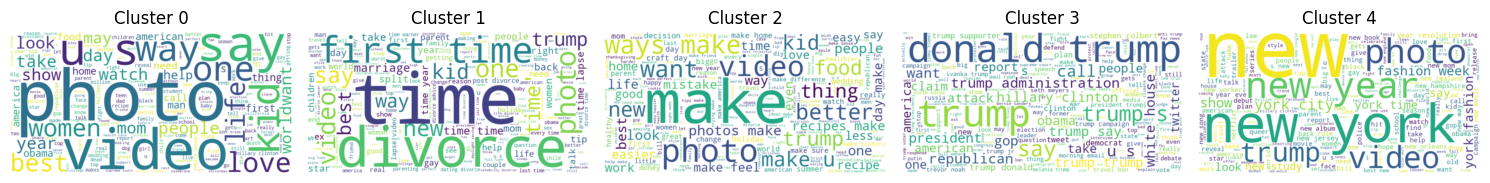

C:\Users\Admin\AppData\Local\Temp\ipykernel_16668\719123129.py:68: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




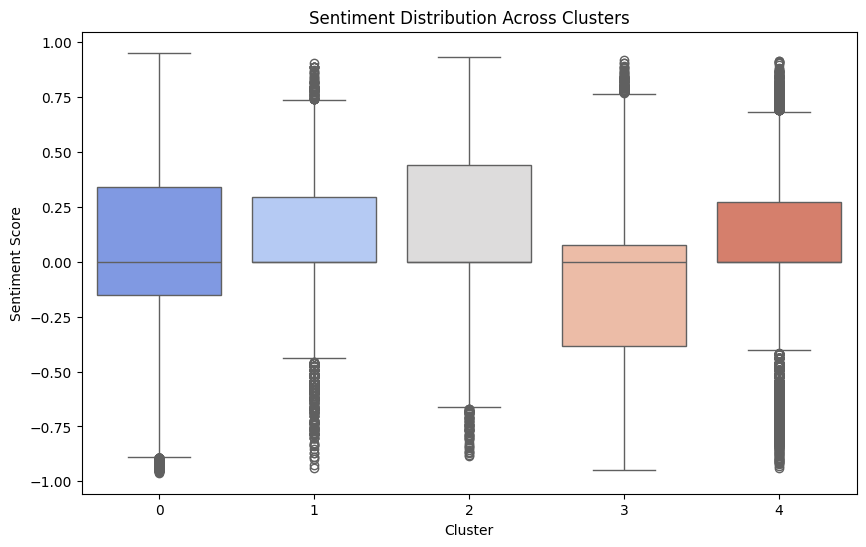

                                             headline  sentiment_score  \
0   Over 4 Million Americans Roll Up Sleeves For O...           0.0000   
1   American Airlines Flyer Charged, Banned For Li...          -0.5859   
2   23 Of The Funniest Tweets About Cats And Dogs ...           0.5574   
3   The Funniest Tweets From Parents This Week (Se...           0.5574   
4   Woman Who Called Cops On Black Bird-Watcher Lo...          -0.4939   
5   Cleaner Was Dead In Belk Bathroom For 4 Days B...          -0.5574   
6   Reporter Gets Adorable Surprise From Her Boyfr...           0.6486   
7   Puerto Ricans Desperate For Water After Hurric...          -0.3182   
8   How A New Documentary Captures The Complexity ...           0.0000   
9   Biden At UN To Call Russian War An Affront To ...          -0.5994   
10  World Cup Captains Want To Wear Rainbow Armban...           0.0772   
11  Man Sets Himself On Fire In Apparent Protest O...          -0.7096   
12  Fiona Threatens To Become Category

In [114]:
# Install required libraries if not installed
# !pip install pandas numpy matplotlib seaborn scikit-learn wordcloud nltk vaderSentiment

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from wordcloud import WordCloud
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import nltk

# Download required NLTK data
nltk.download('vader_lexicon')
nltk.download('stopwords')


# Drop NaN values from the 'headline' column
df = df.dropna(subset=['headline'])

# Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()
stop_words = set(stopwords.words('english'))

# Function to clean text
def clean_text(text):
    if isinstance(text, str):
        words = text.lower().split()
        words = [word for word in words if word not in stop_words and word not in string.punctuation]
        return " ".join(words)
    return text

# Apply text cleaning
df['cleaned_headline'] = df['headline'].apply(clean_text)

# Compute Sentiment Scores
df['sentiment_score'] = df['cleaned_headline'].apply(lambda x: sia.polarity_scores(x)['compound'])

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['cleaned_headline'])

# K-Means Clustering
num_clusters = 5  # Define number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X)

# WordCloud Visualization for Each Cluster
plt.figure(figsize=(15, 8))
for i in range(num_clusters):
    plt.subplot(1, num_clusters, i + 1)  # Adjust subplot layout
    cluster_text = " ".join(df[df['cluster'] == i]['cleaned_headline'])  
    wordcloud = WordCloud(background_color='white', width=800, height=400).generate(cluster_text)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Cluster {i}')

plt.tight_layout()
plt.show()

# Visualize Sentiment Distribution Across Clusters
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='sentiment_score', data=df, palette='coolwarm')
plt.title('Sentiment Distribution Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Sentiment Score')
plt.show()

# Apply sentiment analysis on 'short_description' (if available)
if 'short_description' in df.columns:
    df['cleaned_description'] = df['short_description'].apply(clean_text)

    # Function to get sentiment scores
    def get_sentiment_scores(text):
        if isinstance(text, str):
            return sia.polarity_scores(text)
        return {"neg": 0, "neu": 0, "pos": 0, "compound": 0}

    df['sentiment'] = df['cleaned_description'].apply(get_sentiment_scores)

    # Extract individual sentiment scores
    df['neg'] = df['sentiment'].apply(lambda x: x['neg'])
    df['neu'] = df['sentiment'].apply(lambda x: x['neu'])
    df['pos'] = df['sentiment'].apply(lambda x: x['pos'])
    df['compound'] = df['sentiment'].apply(lambda x: x['compound'])

    # Drop the dictionary column
    df.drop(columns=['sentiment'], inplace=True)

# Show Sample Headlines with Clusters and Sentiment Scores
print(df[['headline', 'sentiment_score', 'cluster']].head(15))


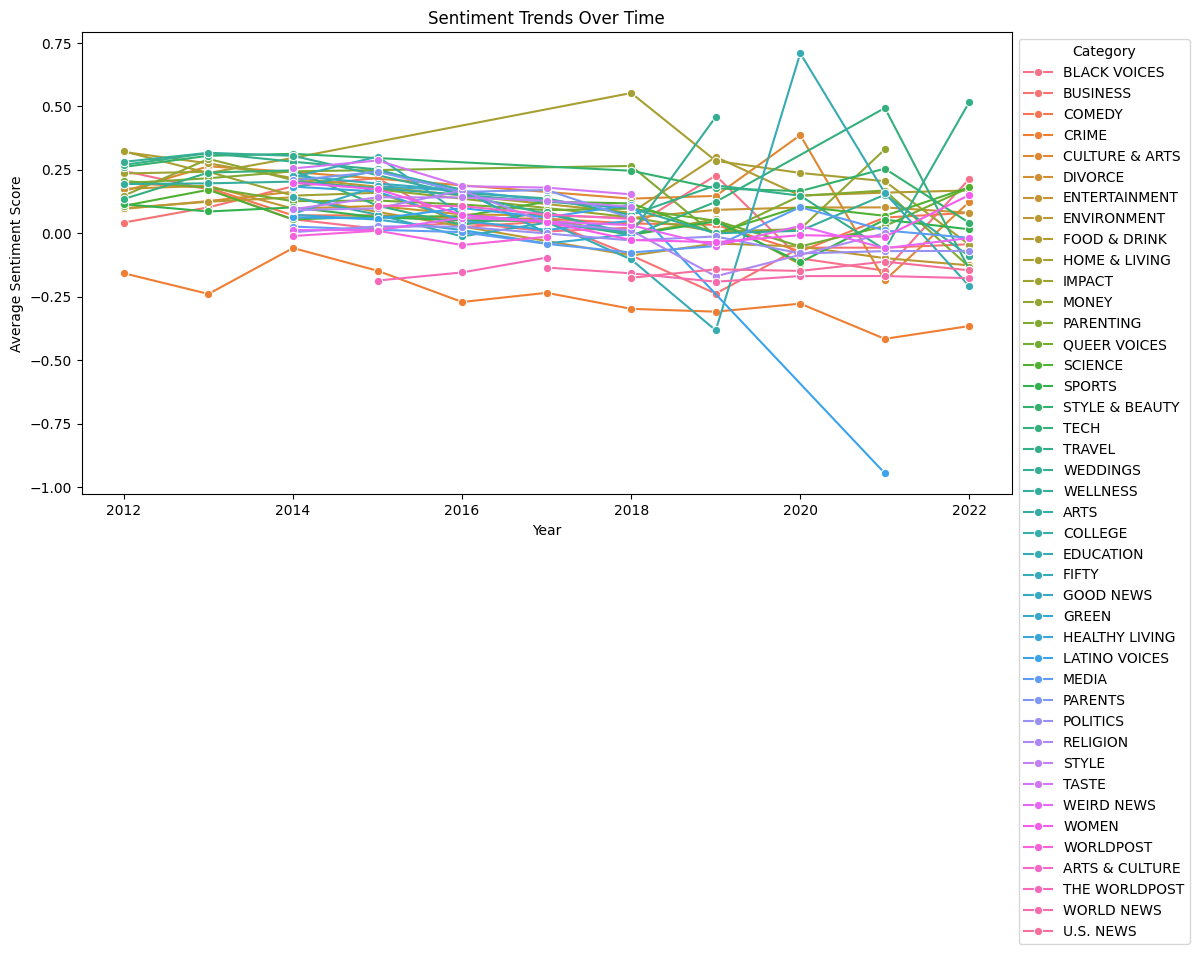

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract the year from the date
df['year'] = df['date'].dt.year

# Group by year and category, calculating the mean sentiment score
sentiment_trend = df.groupby(['year', 'category'])['compound'].mean().reset_index()

# Plot sentiment trends using a bar chart
plt.figure(figsize=(12, 6))
# sns.barplot(x='year', y='compound', hue='category', data=sentiment_trend,  palette='coolwarm')
sns.lineplot(x='year', y='compound', hue='category', data=sentiment_trend, marker="o" )

# Labels and title
plt.xlabel('Year')
plt.ylabel('Average Sentiment Score')
plt.title('Sentiment Trends Over Time')
plt.legend(title='Category', bbox_to_anchor=(1, 1))

# Show plot
plt.show()


In [117]:
df.to_csv('output1.csv', index=False)

In [121]:


import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots



# df = pd.read_csv('/content/output1.csv')
df["date"] = pd.to_datetime(df["date"])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

setimant_trend = df.groupby(["year", "month", "category"])[["compound"]].mean().reset_index()

years = sorted(setimant_trend["year"].unique())
months = sorted(setimant_trend["month"].unique())

# Create dropdown menus
year_dropdown = []
for year in years:
    year_dropdown.append(dict(
        method='update',
        args=[{'visible': [y == year for y in years]},
              {'title': f'Sentiment Score by Year: {year}'}],
        label=str(year)))

month_dropdown = []
for month in months:
    month_dropdown.append(dict(
        method='update',
        args=[{'visible': [m == month for m in months]},
              {'title': f'Sentiment Score by Month: {month}'}],
        label=str(month)))


# Create initial figure
fig = px.line(setimant_trend, x="category", y="compound", color="category",
              title="Sentiment Score by Year and Month")

# Add traces for each year
for year in years:
    df_year = setimant_trend[setimant_trend["year"] == year]
    fig.add_trace(go.Scatter(x=df_year["category"], y=df_year["compound"],
                             mode='lines+markers', name=str(year),
                             visible=False if year != years[0] else True))


# Update layout with dropdown menus
fig.update_layout(
    updatemenus=[
        dict(active=0, buttons=year_dropdown, direction='down',
             x=0.1, xanchor='left', y=1.1, yanchor='top'),
        dict(active=0, buttons=month_dropdown, direction='down',
             x=0.3, xanchor='left', y=1.1, yanchor='top'),

    ])

# Show the plot
fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed